In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Gráfico de barras

In [7]:
ejeX=np.array([1,2,3,4,5,6,7,8,9,10])
YBill=np.array([78.8e7,78.6e7,76e7,77.2e7,75e7,76e7,78e7,81e7,86e7,88.9e7])
YJeff=np.array([27.2e7,32e7,30.5e7,34.8e7,47.8e7,47e7,45.2e7,66.2e7,67e7,72.8e7])

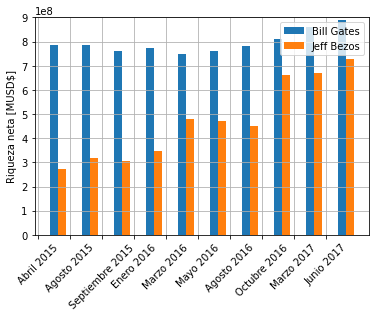

In [12]:
ancho_barra=0.25
plt.bar(ejeX,YBill,width=ancho_barra,label='Bill Gates')
plt.bar(ejeX+ancho_barra,YJeff,width=ancho_barra,label='Jeff Bezos')
meses=['Abril 2015','Agosto 2015','Septiembre 2015','Enero 2016','Marzo 2016','Mayo 2016','Agosto 2016','Octubre 2016','Marzo 2017','Junio 2017']
plt.xticks(ejeX-0.5,meses,rotation=45)
plt.ylabel('Riqueza neta [MUSD$]')
plt.grid(True)
plt.legend()
plt.ylim(0,90e7)
plt.show()

# Gráfico de línea e histograma

In [13]:
import pandas as pd

In [32]:
datos= pd.read_csv('C://Users//Samue//x-anaconda//datos//Datos Banco Mundial//Indicators.csv')
datos.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


#### ¿Cuántos datos hay?

In [18]:
datos.shape

(5656458, 6)

#### ¿Cuántos países hay en la base de datos?

In [21]:
codigosPaises=datos['CountryCode'].unique().tolist()
len(codigosPaises)

247

#### ¿Cuáles y cuántos indicadores hay?

In [24]:
indicadores = datos['IndicatorName'].unique().tolist()
print(indicadores[:100])
len(indicadores)


['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old (% of working-age population)', 'Age dependency ratio, young (% of working-age population)', 'Arms exports (SIPRI trend indicator values)', 'Arms imports (SIPRI trend indicator values)', 'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'CO2 emissions from gaseous fuel consumption (% of total)', 'CO2 emissions from liquid fuel consumption (% of total)', 'CO2 emissions from liquid fuel consumption (kt)', 'CO2 emissions from solid fuel consumption (% of total)', 'Death rate, crude (per 1,000 people)', 'Fertility rate, total (births per woman)', 'Fixed telephone subscriptions', 'Fixed telephone subscriptions (per 100 people)', 'Hospital beds (per 1,000 people)', 'International migrant stock (% of population)', 'International migrant stock, total', 'Life expectancy at birth, female (years)', 

1344

#### ¿Cuántos años de datos hay?

In [26]:
anyos = datos['Year'].unique().tolist()
len(anyos)

56

#### ¿Qué rango de años?

In [27]:
print(min(anyos),' - ',max(anyos))

1960  -  2015


#### Visualizacion de datos

In [34]:
indicador='CO2 emissions \(metric tons per capita'
pais='COL'

filtro1=datos['IndicatorName'].str.contains(indicador)
filtro2=datos['CountryCode'].str.contains(pais)

datosFiltrados=datos[filtro1 & filtro2]
datosFiltrados.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7274,Colombia,COL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.995719
31608,Colombia,COL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,1.072743
58794,Colombia,COL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.110986
87176,Colombia,COL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,1.178781
115902,Colombia,COL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,1.168264


#### Gráfico de barras

<class 'numpy.ndarray'>


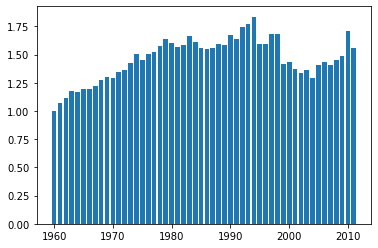

In [36]:
años=datosFiltrados['Year'].values
co2=datosFiltrados['Value'].values
print(type(años))
plt.bar(años,co2)
plt.show()

#### Gráfico de línea

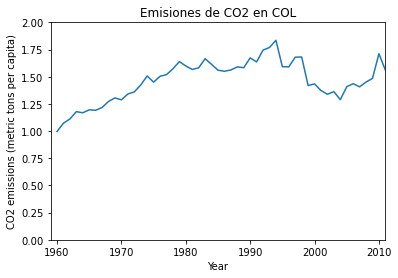

In [38]:
plt.plot(años, co2)

plt.xlabel('Year')
plt.ylabel(datosFiltrados['IndicatorName'].iloc[0])

plt.title('Emisiones de CO2 en ' + pais)
# [Xmin,Xmax,Ymin,Ymax]
plt.axis([1959,2011,0,2])

plt.show()

#### Histograma

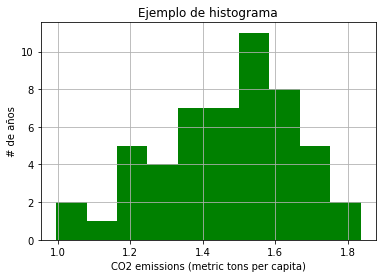

In [41]:
plt.hist(datosFiltrados['Value'].values, 10, facecolor='green')

plt.xlabel(datosFiltrados['IndicatorName'].iloc[0])
plt.ylabel('# de años')
plt.title('Ejemplo de histograma')

plt.grid(True)

plt.show()

#### Gráfico de dispersión

55  -  52


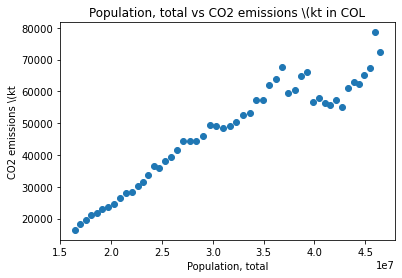

In [45]:
indicador1='Population, total'
indicador2='CO2 emissions \(kt'
pais='COL'

filtro1=datos['IndicatorName'].str.contains(indicador1)
filtro2=datos['CountryCode'].str.contains(pais)

datosInd1=datos[filtro1 & filtro2]

filtro1=datos['IndicatorName'].str.contains(indicador2)
filtro2=datos['CountryCode'].str.contains(pais)

datosInd2=datos[filtro1 & filtro2]

X=datosInd1['Value'].values
Y=datosInd2['Value'].values

print(len(X),' - ',len(Y))
limite=min(len(X),len(Y))

plt.xlabel(indicador1)
plt.ylabel(indicador2)
plt.title(indicador1 + " vs " + indicador2 + " in " + pais)

plt.scatter(X[:limite],Y[:limite])

In [46]:
np.corrcoef(X[:limite],Y[:limite])

array([[1.        , 0.95435265],
       [0.95435265, 1.        ]])

#### Gráfico de dispersión 2

In [47]:
from sklearn import datasets

In [48]:
iris = datasets.load_iris()

In [53]:
print(iris.data[:10,:],' - ', iris.target[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]  -  [0 0 0 0 0 0 0 0 0 0]


In [50]:
X=iris.data[:,2]
type(X)

numpy.ndarray

In [51]:
Y=iris.data[:,3]

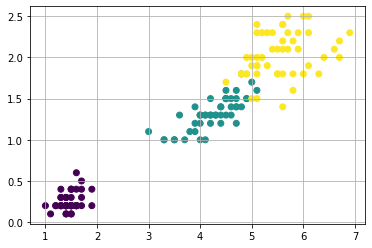

In [52]:
colors=iris.target
plt.scatter(X,Y,c=colors)
plt.grid(True)
plt.show()

In [ ]:
X=iris.data[:,2]